<a href="https://colab.research.google.com/github/Rlours/VaccinePrediction-H1N1_Flu/blob/main/H1N1_Flu_VaccinePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PROBLEM DESCRIPTION
To predict how likely individuals are to receive their H1N1 and seasonal flu vaccines. Specifically, we have to predict two probabilities: one for h1n1_vaccine and one for seasonal_vaccine.

Each row in the dataset represents one person who responded to the National 2009 H1N1 Flu Survey.

##Labels
There are two target variables:

h1n1_vaccine - Whether respondent received H1N1 flu vaccine.
seasonal_vaccine - Whether respondent received seasonal flu vaccine.
Both are binary variables: 0 = No; 1 = Yes.<br>
Some respondents didn't get either vaccine, others got only one, and some got both. This is formulated as a multilabel (and not multiclass) problem.

#Basic Information -- Training dataset

In [35]:
# Mounting Drive
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##Importing libraries

In [36]:
# Importing libraries
import pandas as pd
import numpy as np

##Importing Dataset

In [37]:
# Importing training set features
df_train_features = pd.read_csv('/content/drive/MyDrive/Data_Analysis/H1N1Flu-Prediction/training_set_features.csv')

# Importing training set labels
df_train_labels = pd.read_csv('/content/drive/MyDrive/Data_Analysis/H1N1Flu-Prediction/training_set_labels .csv')

##Basic Information

In [38]:
# Dsipaly Feature Information
display(df_train_features.head())

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [39]:
# Display Label Information
display(df_train_labels.head())

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [40]:
# Shape of Training Feature dataset
print("Training Features Shape ", df_train_features.shape)

Training Features Shape  (26707, 36)


In [41]:
df_train_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 36 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [42]:
# Shape of Training labels
print("Training Labels Shape ", df_train_labels.shape)


Training Labels Shape  (26707, 3)


Double-check that the rows between the features and the labels match up.

In [43]:
np.testing.assert_array_equal(df_train_features.index.values, df_train_labels.index.values)

The assertion ran, without error it means there is no problem. If the two index arrays were not the same, there would be an error.

#Data Exploration

##Importing Libraries

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

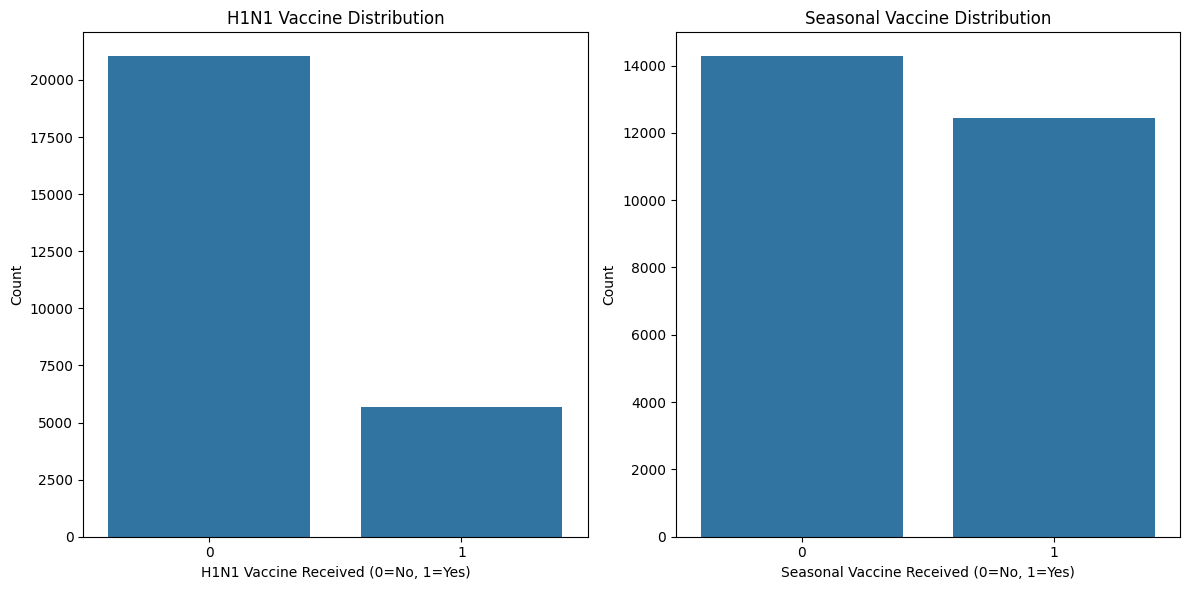

H1N1 Vaccine:
h1n1_vaccine
0    21033
1     5674
Name: count, dtype: int64
h1n1_vaccine
0    78.754634
1    21.245366
Name: proportion, dtype: float64

Seasonal Vaccine:
seasonal_vaccine
0    14272
1    12435
Name: count, dtype: int64
seasonal_vaccine
0    53.439173
1    46.560827
Name: proportion, dtype: float64


In [45]:
# Plot the distribution of H1N1 and seasonal flu vaccinations
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.countplot(x='h1n1_vaccine', data=df_train_labels, ax=axes[0])
axes[0].set_title('H1N1 Vaccine Distribution')
axes[0].set_xlabel('H1N1 Vaccine Received (0=No, 1=Yes)')
axes[0].set_ylabel('Count')

sns.countplot(x='seasonal_vaccine', data=df_train_labels, ax=axes[1])
axes[1].set_title('Seasonal Vaccine Distribution')
axes[1].set_xlabel('Seasonal Vaccine Received (0=No, 1=Yes)')
axes[1].set_ylabel('Count')

plt.tight_layout()
plt.show()

# Display the number and percentage of H1N1 and seasonal flu vaccinations
h1n1_counts = df_train_labels['h1n1_vaccine'].value_counts()
h1n1_percentages = df_train_labels['h1n1_vaccine'].value_counts(normalize=True) * 100

seasonal_counts = df_train_labels['seasonal_vaccine'].value_counts()
seasonal_percentages = df_train_labels['seasonal_vaccine'].value_counts(normalize=True) * 100

print("H1N1 Vaccine:")
print(h1n1_counts)
print(h1n1_percentages)

print("\nSeasonal Vaccine:")
print(seasonal_counts)
print(seasonal_percentages)

Conclusion : Approximately half of people received the seasonal flu vaccine, but only about 20% of people received the H1N1 flu vaccine. In terms of class balance, we say that the seasonal flu vaccine target has balanced classes, but the H1N1 flu vaccine target has moderately imbalanced classes.

In [46]:
pd.crosstab(
    df_train_labels["h1n1_vaccine"], df_train_labels["seasonal_vaccine"], margins=True, normalize=True
)

seasonal_vaccine,0,1,All
h1n1_vaccine,,,
0,0.497810,0.289737,0.787546
1,0.036582,0.175871,0.212454
All,0.534392,0.465608,1.000000


In [47]:
# Phi Coefficient is the same as Pearson for two binary variables
(df_train_labels["h1n1_vaccine"].corr(df_train_labels["seasonal_vaccine"], method="pearson"))

np.float64(0.37714265306144495)

These two variables have a phi coefficient of 0.37, indicating a moderate positive correlation. Most people who got an H1N1 flu vaccine also got the seasonal flu vaccine. While a minority of people who got the seasonal vaccine got the H1N1 vaccine, they got the H1N1 vaccine at a higher rate than those who did not get the seasonal vaccine.

### **FEATURES**

Combine our features and labels into one dataframe.

In [48]:
joined_df = pd.merge(df_train_features, df_train_labels, on='respondent_id')
print(joined_df.shape)
display(joined_df.head())

(26707, 38)


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


First We'll use h1n1_concern, the level of concern the person showed about the H1N1 flu, and h1n1_vaccine as a target variable.

we'll get the count of observations for each combination of those two variables.

In [49]:
counts = (
    joined_df[["h1n1_concern", "h1n1_vaccine"]]
    .groupby(["h1n1_concern", "h1n1_vaccine"])
    .size()
    .unstack("h1n1_vaccine")
)
counts

h1n1_vaccine,0,1
h1n1_concern,,
0.0,2849,447
1.0,6756,1397
2.0,8102,2473
3.0,3250,1341


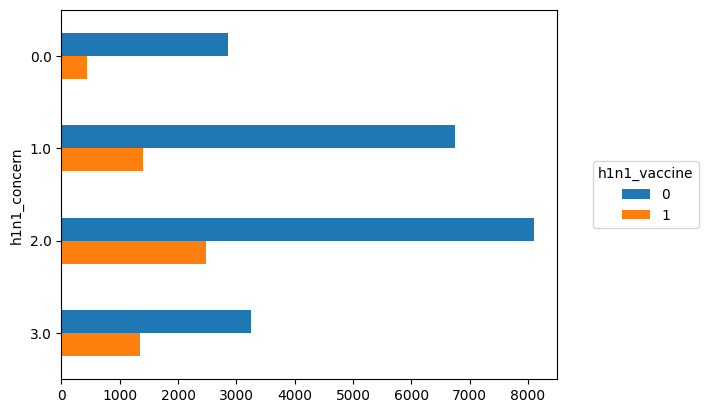

In [50]:
ax = counts_concern.plot.barh()
ax.invert_yaxis()
ax.legend(loc="center right", bbox_to_anchor=(1.3, 0.5), title="h1n1_vaccine")

Unfortunately, it's still hard to tell whether h1n1_concern levels show differences in someone's likelihood to get vaccinated. Since the two classes are imbalanced, we just see fewer vaccinated observations for every level of h1n1_concern. It swamps out any other trends that might exist.

Let's instead look at the rate of vaccination for each level of h1n1_concern.

In [51]:
h1n1_concern_counts = counts.sum(axis="columns")
h1n1_concern_counts

,0
h1n1_concern,
0.0,3296
1.0,8153
2.0,10575
3.0,4591


In [52]:
props = counts_concern.div(h1n1_concern_counts, axis="index")
props


h1n1_vaccine,0,1
h1n1_concern,,
0.0,0.864381,0.135619
1.0,0.828652,0.171348
2.0,0.766147,0.233853
3.0,0.707907,0.292093


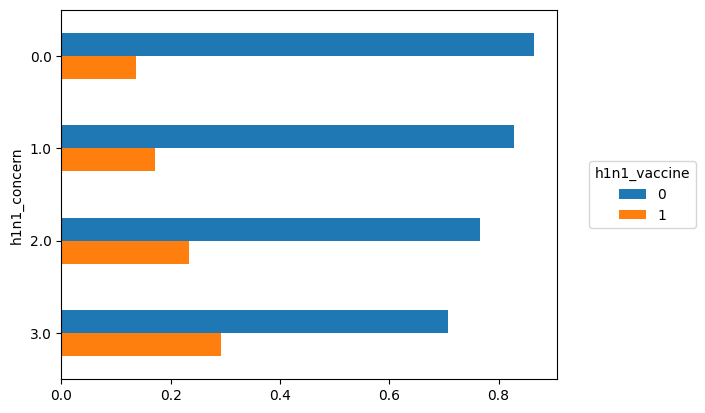

In [53]:
ax = props.plot.barh()
ax.invert_yaxis()
ax.legend(loc="center left", bbox_to_anchor=(1.05, 0.5), title="h1n1_vaccine")

In [54]:
def vaccination_rate_plot(col, target, data, ax=None):
    """Stacked bar chart of vaccination rate for `target` against
    `col`.

    Args:
        col (string): column name of feature variable
        target (string): column name of target variable
        data (pandas DataFrame): dataframe that contains columns
            `col` and `target`
        ax (matplotlib axes object, optional): matplotlib axes
            object to attach plot to
    """
    counts = joined_df[[target, col]].groupby([target, col]).size().unstack(target)
    group_counts = counts.sum(axis="columns")
    props = counts.div(group_counts, axis="index")

    props.plot(kind="barh", stacked=True, ax=ax)
    ax.invert_yaxis()
    ax.legend().remove()

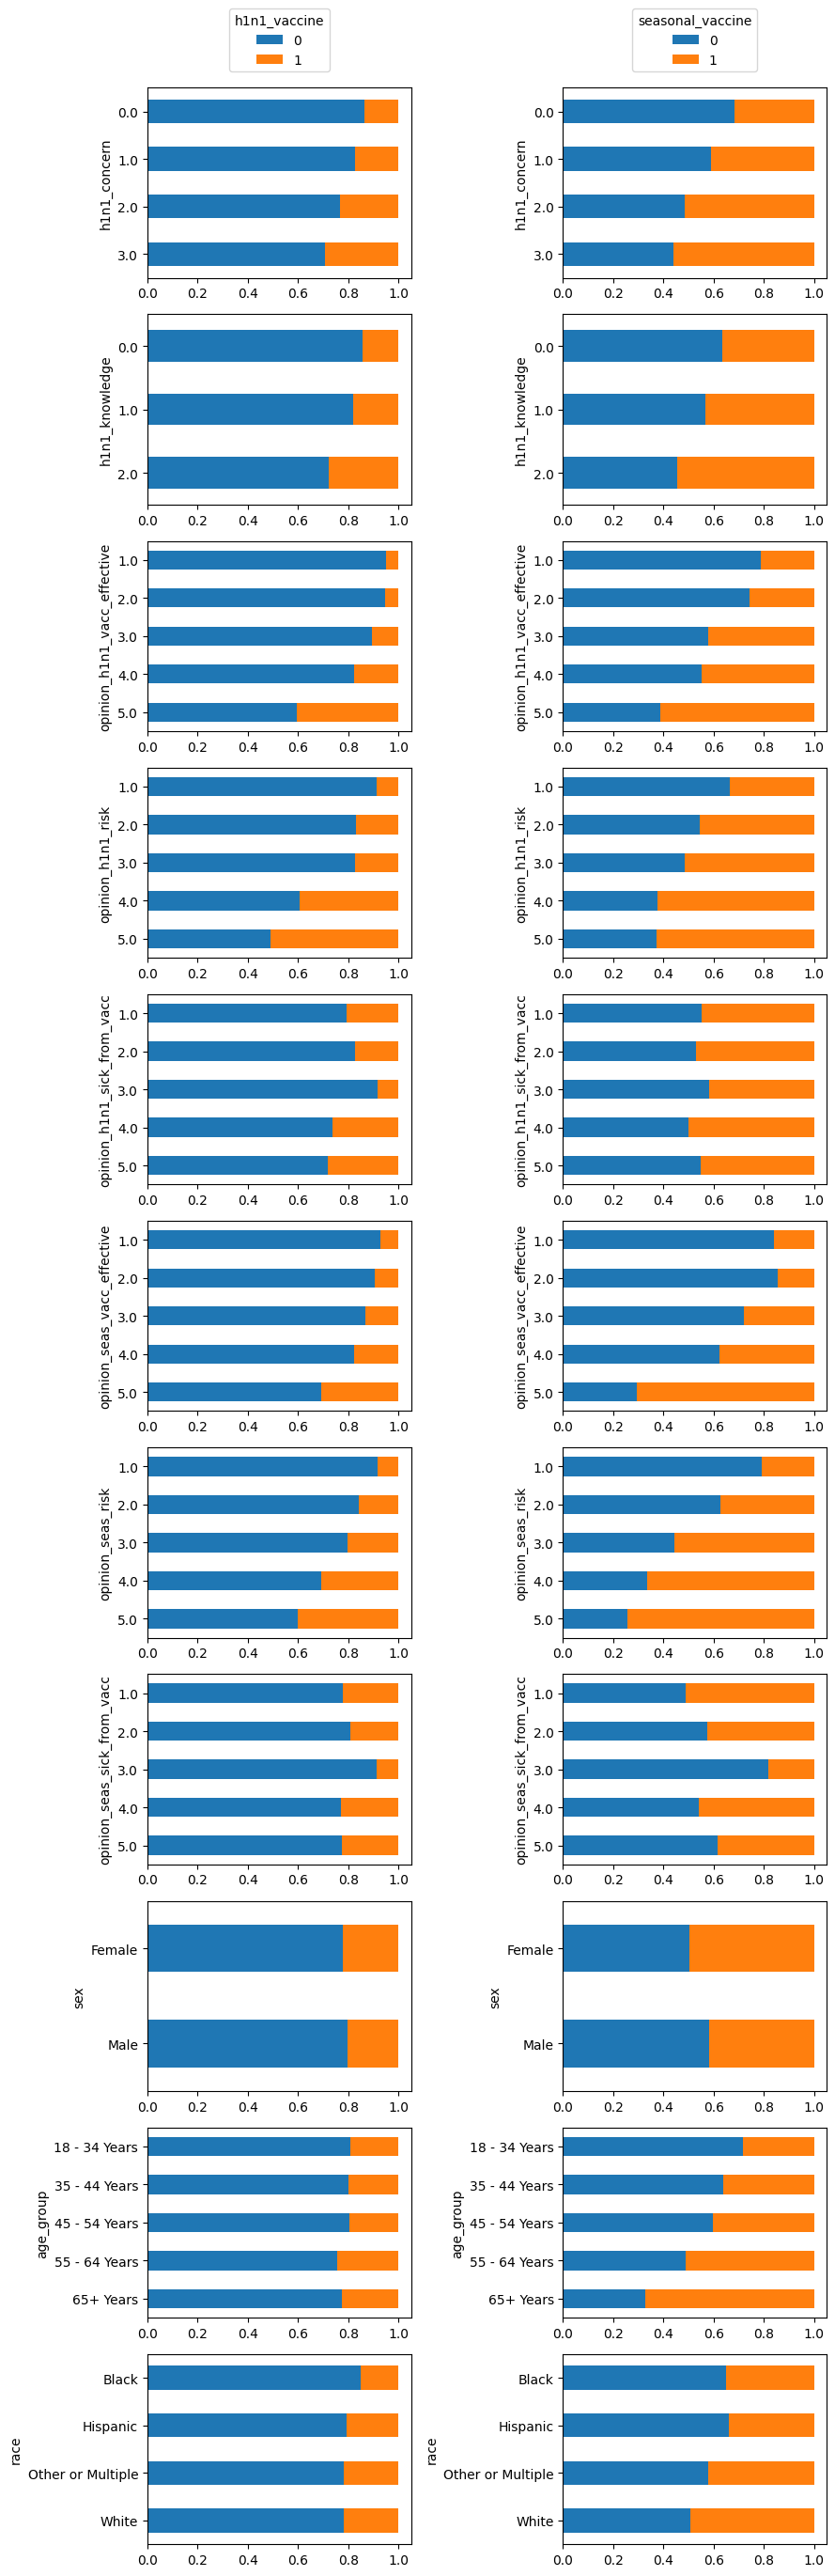

In [55]:
cols_to_plot = [
    "h1n1_concern",
    "h1n1_knowledge",
    "opinion_h1n1_vacc_effective",
    "opinion_h1n1_risk",
    "opinion_h1n1_sick_from_vacc",
    "opinion_seas_vacc_effective",
    "opinion_seas_risk",
    "opinion_seas_sick_from_vacc",
    "sex",
    "age_group",
    "race",
]

fig, ax = plt.subplots(len(cols_to_plot), 2, figsize=(9, len(cols_to_plot) * 2.5))
for idx, col in enumerate(cols_to_plot):
    vaccination_rate_plot(col, "h1n1_vaccine", joined_df, ax=ax[idx, 0])
    vaccination_rate_plot(col, "seasonal_vaccine", joined_df, ax=ax[idx, 1])

ax[0, 0].legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), title="h1n1_vaccine")
ax[0, 1].legend(loc="lower center", bbox_to_anchor=(0.5, 1.05), title="seasonal_vaccine")
fig.tight_layout()

It looks like the knowledge and opinion questions have pretty strong signal for both target variables.

The demographic features have stronger correlation with seasonal_vaccine, but much less so far h1n1_vaccine. In particular, we interestingly see a strong correlation with age_group with the seasonal_vaccine but not with h1n1_vaccine. It appears that with seasonal flu, people act appropriately according to the fact that people more impacted and have higher risk of flu-related complications with age. It turns out though that H1N1 flu has an interesting relationship with age: even though older people have higher risk of complications, they were less likely to get infected! While we know anything about causality from this analysis, it seems like the risk factors ended up being reflected in the vaccination rates.

#Building Models